<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [842]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import re
import random

from ydata_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error as MSE



random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Смысл random.seed() в том, чтобы сделать «случайность» контролируемой и предсказуемой. Генератор псевдослучайных чисел — это предсказуемый алгоритм. Если задать одно и то же начальное значение (seed), он будет проходить по одной и той же «дорожке» чисел.

"Изучен с помощью интернета и llm"

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [843]:
import pandas as pd

In [844]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [845]:
df_train.sample(n=30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [846]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [847]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [848]:
df_train.columns[df_train.isna().any()].tolist()



['mileage', 'engine', 'max_power', 'torque', 'seats']

In [849]:
df_test.columns[df_test.isna().any()].tolist()



['mileage', 'engine', 'max_power', 'torque', 'seats']

In [850]:
df_train[df_train.duplicated()]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
326,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
6881,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [851]:
df_test[df_test.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
200,Maruti Swift AMT VVT VXI,2019,650000,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
235,Hyundai Grand i10 1.2 CRDi Sportz,2017,450000,56290,Diesel,Dealer,Manual,First Owner,24.0 kmpl,1186 CC,73.97 bhp,190.24nm@ 1750-2250rpm,5.0
238,Toyota Camry 2.5 Hybrid,2016,2000000,68089,Petrol,Trustmark Dealer,Automatic,First Owner,19.16 kmpl,2494 CC,157.7 bhp,213Nm@ 4500rpm,5.0
253,Tata Safari Storme EX,2015,503000,110000,Diesel,Individual,Manual,First Owner,14.1 kmpl,2179 CC,147.94 bhp,320Nm@ 1500-3000rpm,7.0
269,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,254.79 bhp,620Nm@ 1600-2400rpm,5.0
936,BMW X4 M Sport X xDrive20d,2019,5500000,8500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
949,Toyota Camry 2.5 Hybrid,2016,2000000,68089,Petrol,Trustmark Dealer,Automatic,First Owner,19.16 kmpl,2494 CC,157.7 bhp,213Nm@ 4500rpm,5.0
971,Maruti Ertiga SHVS ZDI Plus,2017,750000,50000,Diesel,Individual,Manual,First Owner,24.52 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,7.0


### Пункт 2
1. Проверяем в целом, что наш датасет загрузился корректно, знакомимся со структурой (колонки, типы данных) визуально.
2. Наверное нет, потому что он смотрит полное совпадение строк - как я понимаю не учитывая например регистр - то есть если будет Manual и manual - он не посчитает это дубликатом, а также типы различные, например int и float: если будет 1 и 1.0 он тоже не посчитает это дубликатом

In [852]:
profile_train = ProfileReport(df_train, title="YData Profiling Report")
profile_train.to_file("report_train.html")

profile_test = ProfileReport(df_test, title="YData Profiling Report")
profile_test.to_file("report_test.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 68.78it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 139.79it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [853]:
def extract_number(value):
    if pd.isna(value):
        return np.nan
    value_str = str(value).strip()
    match = re.search(r'\d*\.?\d+', value_str)
    if match:
        return float(match.group()) 
    return np.nan

cols = ['engine', 'mileage', 'max_power']
cols_nan_to_mean = ['engine', 'mileage', 'max_power', 'seats']

for col in cols:
    df_train[col] = df_train[col].apply(extract_number)

for col in cols_nan_to_mean:
    df_train[col] = df_train[col].fillna(df_train[col].mean())
    
for col in cols:
    df_test[col] = df_test[col].apply(extract_number)

for col in cols_nan_to_mean:
    df_test[col] = df_test[col].fillna(df_test[col].mean())

In [854]:
print(df_train[['engine', 'mileage', 'seats','max_power']].head(15))
# для себя проверка, что все отработало
print(df_test[['engine', 'mileage', 'seats','max_power']].head(15))
# для себя проверка, что все отработало

         engine    mileage     seats   max_power
0   1248.000000  23.400000  5.000000   74.000000
1   1498.000000  21.140000  5.000000  103.520000
2   1396.000000  23.000000  5.000000   90.000000
3   1298.000000  16.100000  5.000000   88.200000
4   1197.000000  20.140000  5.000000   81.860000
5   1061.000000  17.300000  5.000000   57.500000
6    796.000000  16.100000  4.000000   37.000000
7   1364.000000  23.590000  5.000000   67.100000
8   1399.000000  20.000000  5.000000   68.100000
9   1461.000000  19.010000  5.000000  108.450000
10   993.000000  17.300000  5.000000   60.000000
11  1248.000000  19.300000  5.000000   73.900000
12  1458.327203  19.426604  5.419008   91.500023
13  1061.000000  18.900000  5.000000   67.000000
14  1198.000000  18.150000  5.000000   82.000000
    engine  mileage  seats  max_power
0   2498.0    14.00    7.0     112.00
1   1497.0    21.50    5.0     108.50
2   1799.0    12.90    5.0     130.00
3   1498.0    25.10    5.0      98.60
4   1172.0    16.50    5.0

In [855]:
# Список колонок для проверки
columns_to_check = ['seats', 'engine', 'mileage', 'max_power']

total_nan = df_train[columns_to_check].isna().sum().sum()
if total_nan == 0:
    print("Пропусков нет")
else:
    print("Пропусков есть")


Пропусков нет


### **Задание 2 (0.5 балла)**

На прошлом шаге вы убедились, что явных дубликатов в таблице нет. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [856]:
# Изначально приводил медианы к типам табличным, решил сразу предобработать эти колонки для удобства.

features = df_train.drop(columns=["selling_price"])

duplicate_mask_all = features.duplicated(keep=False)
num_duplicates = duplicate_mask_all.sum()
print(f"Количество дубликатов: {num_duplicates}")
print(f"Дубли:")
print(df_train[duplicate_mask_all])

df_train = df_train.drop_duplicates(subset = features.columns.tolist(),keep='first').reset_index(drop=True)
print(df_train.shape)
print(df_train.head(5))
#для проверки, что все сработало

Количество дубликатов: 1799
Дубли:
                                          name  year  selling_price  \
22                     Maruti Baleno Delta 1.2  2016         575000   
26                 Maruti Omni E MPI STD BS IV  2018         254999   
27             Maruti Vitara Brezza LDi Option  2017         670000   
28                          Fiat Palio 1.2 ELX  2003          70000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
...                                        ...   ...            ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018         750000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner    mileage  \
22        45000  Petrol  Individual

In [857]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [858]:
# your code here
# Думал над этим моментом выше, но видимо было сделано по заданию, чтоб потренироваться - потому что в пункте 1 чистил значения от обозначений/букв, чтоб посчитать медианы

df_train = df_train.drop(columns=['torque'])
df_test = df_test.drop(columns=['torque'])

df_train.head(3)
df_test.head(3)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,5.0


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [859]:
# your code here
def to_int(value):
    return int(value)

df_train["engine"] = df_train["engine"].apply(to_int)
df_train["seats"] = df_train["seats"].apply(to_int)
df_test["engine"] = df_test["engine"].apply(to_int)
df_test["seats"] = df_test["seats"].apply(to_int)


In [860]:
df_train[["seats", "engine"]].dtypes

seats     int64
engine    int64
dtype: object

In [861]:
df_train.shape


(5840, 12)

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [862]:
# your code here
print("Числовое описание(train):")
print(df_train[["max_power", "engine", "seats", "mileage", "km_driven", "year", "selling_price"]].describe())

print("Категориальное описание(train):")
print(df_train[["name", "fuel", "transmission", "seller_type"]].describe())

print("Числовое описание(test):")
print(df_test[["max_power", "engine", "seats", "mileage", "km_driven", "year", "selling_price"]].describe())

print("Категориальное описание(test):")
print(df_test[["name", "fuel", "transmission", "seller_type"]].describe())



Числовое описание(train):
         max_power       engine        seats      mileage     km_driven  \
count  5840.000000  5840.000000  5840.000000  5840.000000  5.840000e+03   
mean     88.210097  1436.137329     5.426712    19.432644  7.395224e+04   
std      31.627183   484.562519     0.982344     3.985958  6.007114e+04   
min       0.000000   624.000000     2.000000     0.000000  1.000000e+00   
25%      68.000000  1197.000000     5.000000    16.950000  3.900000e+04   
50%      81.860000  1248.000000     5.000000    19.426604  7.000000e+04   
75%      99.000000  1498.000000     5.000000    22.300000  1.000000e+05   
max     400.000000  3604.000000    14.000000    42.000000  2.360457e+06   

              year  selling_price  
count  5840.000000   5.840000e+03  
mean   2013.428425   5.229601e+05  
std       4.095622   5.354320e+05  
min    1983.000000   2.999900e+04  
25%    2011.000000   2.500000e+05  
50%    2014.000000   4.050000e+05  
75%    2017.000000   6.400000e+05  
max    202

In [863]:
#Поменял на 12 потому что мы же удалили колонку torque
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

<Figure size 1200x1000 with 0 Axes>

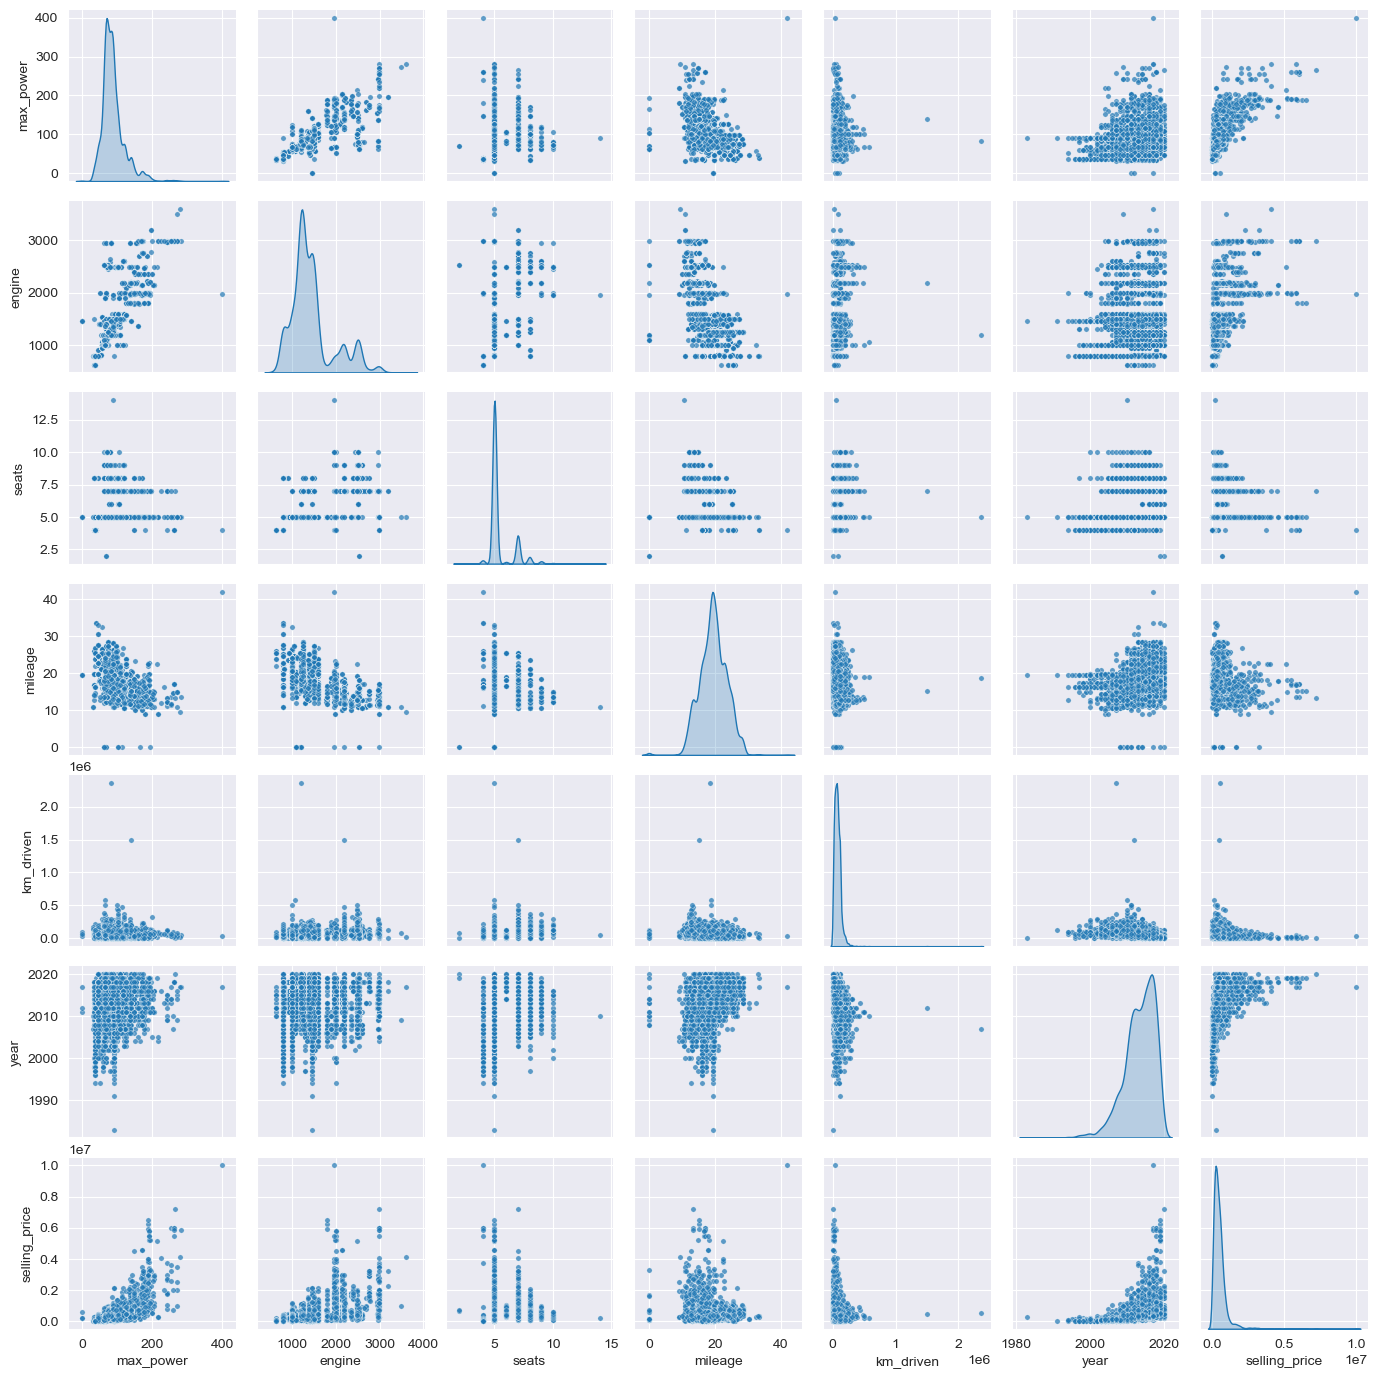

In [864]:
# your code here
# Здесь обращаюсь к лекциям, гугл и LLM - так как плохо разбираюсь в визуализации, работал с ней на годовом проекте только
%matplotlib inline

plt.close('all')
numeric_cols = ["max_power", "engine", "seats", "mileage", "km_driven", "year", "selling_price"]
plt.figure(figsize=(12, 10)) 
sns.pairplot(
    data=df_train[numeric_cols],
    height=2.0,           
    aspect=1.0,         
    diag_kind="kde",     
    plot_kws={"s": 15, "alpha": 0.7} 
)
plt.show()

### Анализ предполагаемых корреляций переменной `selling_price`

На основании визуального анализа данных можно выдвинуть следующие гипотезы о взаимосвязях:

1. **`selling_price` и `max_power`**  
   Наблюдается положительная корреляция: с ростом максимальной мощности двигателя увеличивается цена продажи автомобиля.

2. **`selling_price` и `engine`**  
   Присутствует положительная корреляция, однако она менее выражена по сравнению с `max_power`. Характерно наличие значительного разброса значений, что указывает на влияние других факторов.

3. **`selling_price` и `seats`**  
   Выявлена отрицательная корреляция: увеличение количества посадочных мест сопряжено со снижением цены продажи.


4. **`selling_price` и `mileage`**  
   Установить чёткую зависимость затруднительно. Значения пробега сконцентрированы в узком диапазоне, образуя плотную группу без явных трендов.

5. **`selling_price` и `km_drive`**  
   Фиксируется ярко выраженная отрицательная корреляция: рост пройденного расстояния (км) приводит к существенному снижению стоимости автомобиля.

6. **`selling_price` и `year`**  
   Отмечена положительная корреляция: более новые автомобили (с большим значением года выпуска) имеют более высокую цену продажи.



<Figure size 1200x1000 with 0 Axes>

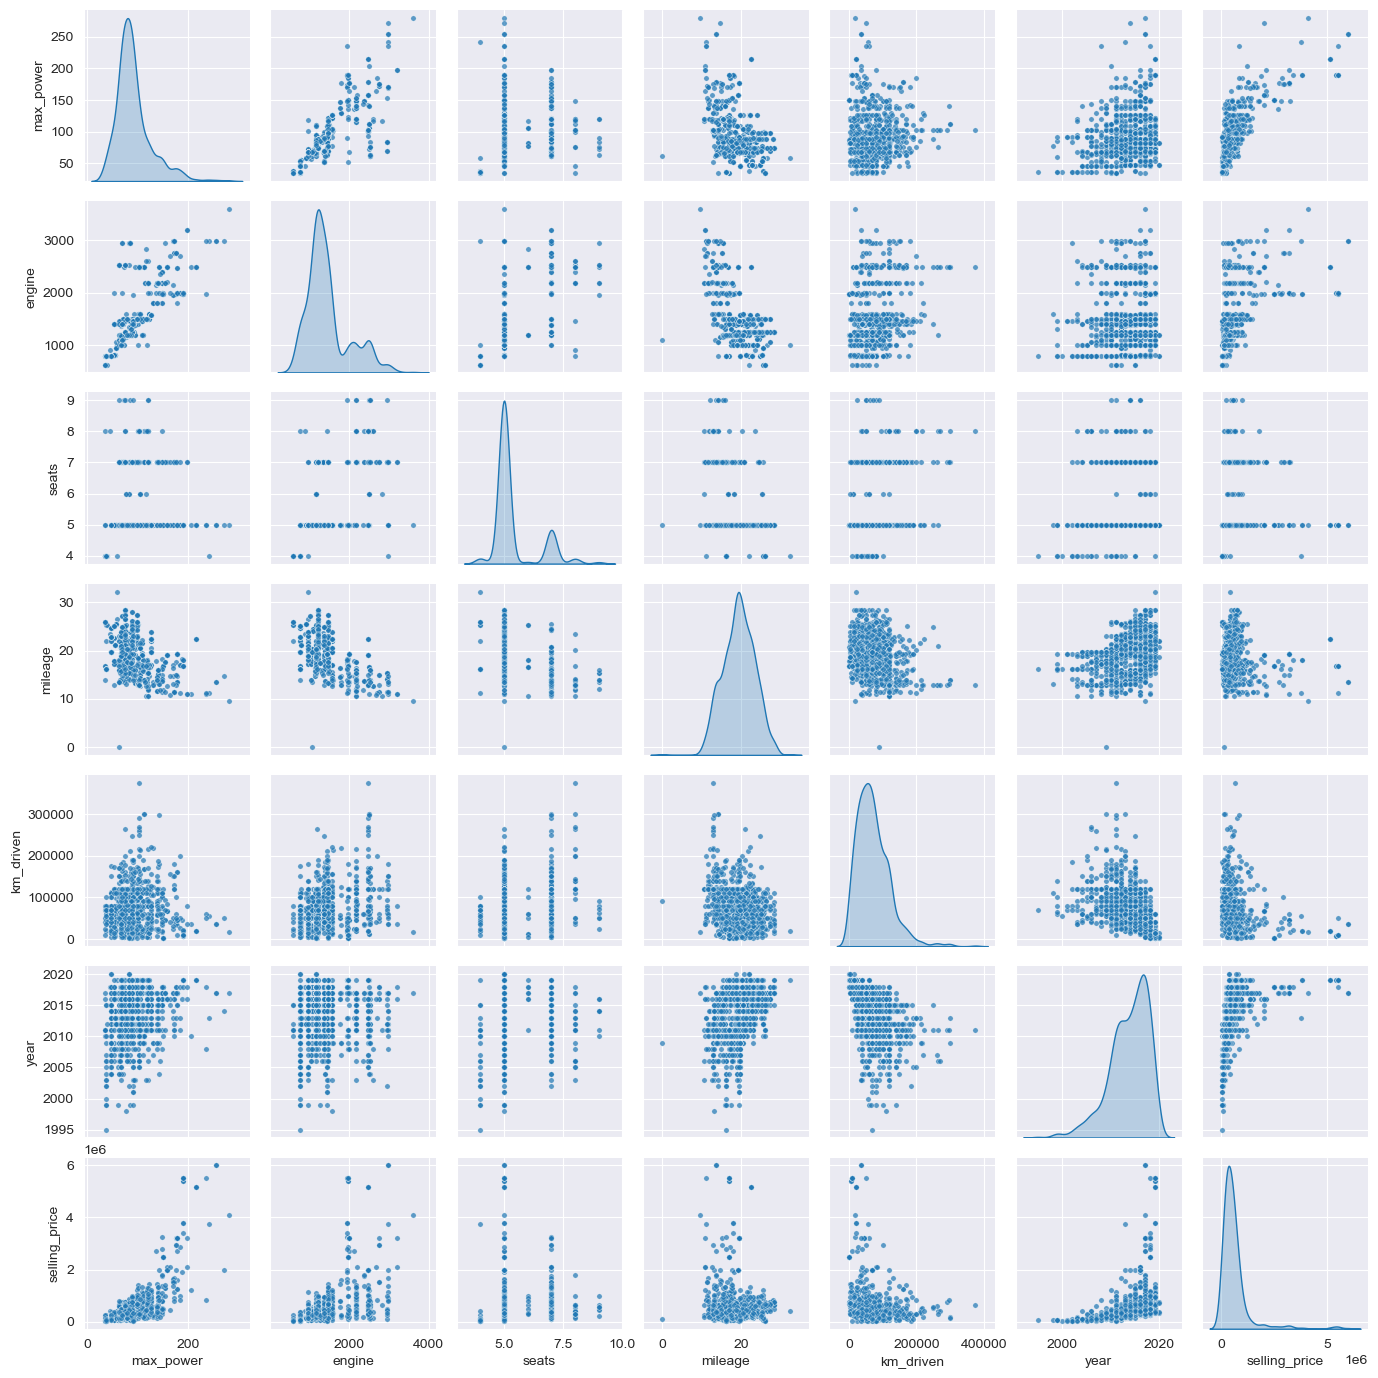

In [865]:
# your code here
# your code here
# Здесь обращаюсь к лекциям, гугл и LLM - так как плохо разбираюсь в визуализации, работал с ней на годовом проекте только
%matplotlib inline

plt.close('all')
numeric_cols = ["max_power", "engine", "seats", "mileage", "km_driven", "year", "selling_price"]
plt.figure(figsize=(12, 10)) 
sns.pairplot(
    data=df_test[numeric_cols],
    height=2.0,           
    aspect=1.0,         
    diag_kind="kde",     
    plot_kws={"s": 15, "alpha": 0.7} 
)
plt.show()

`В целом, распределение selling price в зависимости от других признаков похоже на распределение в трейне, но бросается в глаза большее количество выбросов, а также более "широкие" распредления точек - особенно заметно в km_driven и year`

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


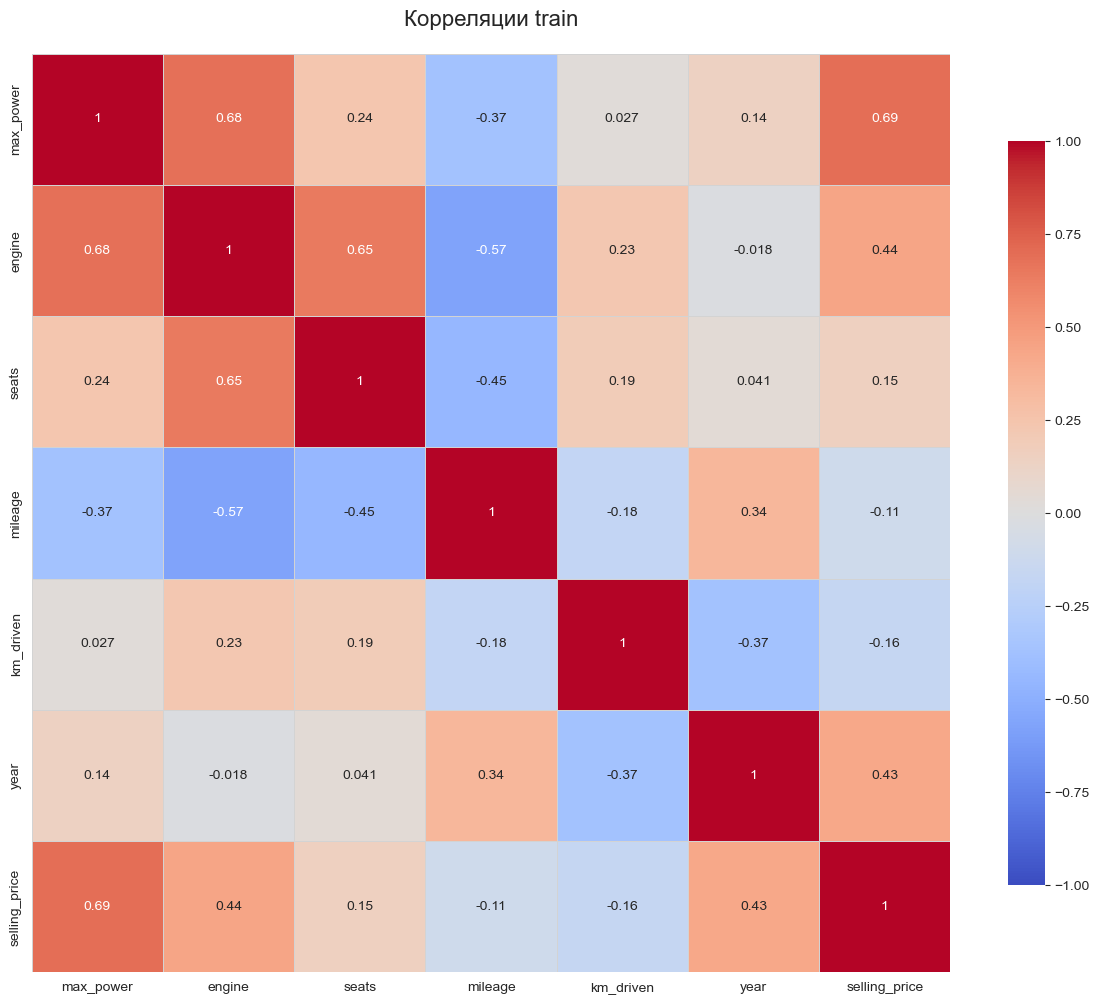

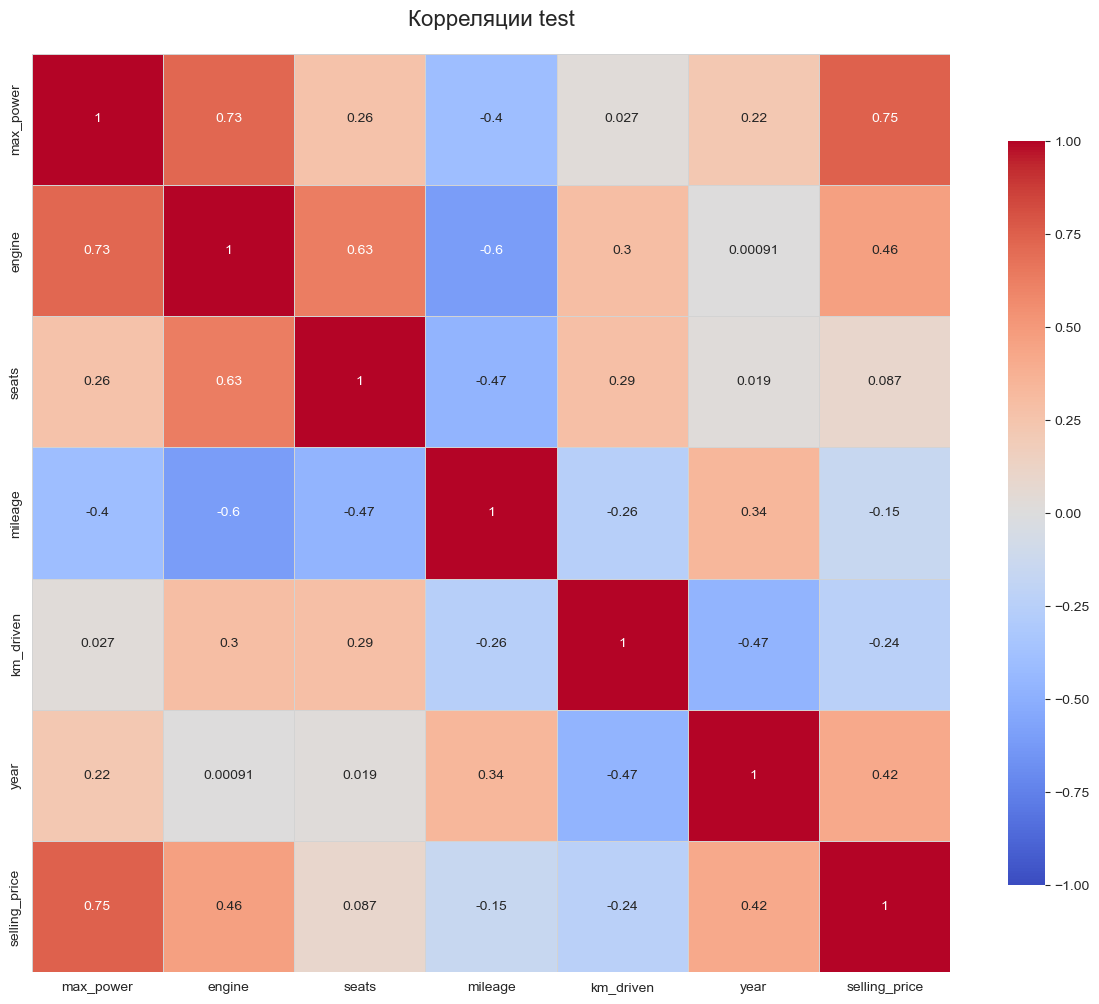

In [866]:
# your code here
correlation_train = df_train[["max_power", "engine", "seats", "mileage", "km_driven", "year", "selling_price"]].corr(method='pearson')

plt.figure(figsize=(12, 10))

sns.heatmap(
    correlation_train,
    annot=True,           
    cmap='coolwarm',      
    vmin=-1, vmax=1,    
    center=0,           
    square=True,         
    linewidths=0.5,    
    linecolor='lightgray', 
    cbar_kws={'shrink': 0.8} 
)

plt.title('Корреляции train', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

correlation_test = df_test[["max_power", "engine", "seats", "mileage", "km_driven", "year", "selling_price"]].corr(method='pearson')

plt.figure(figsize=(12, 10))

sns.heatmap(
    correlation_test,
    annot=True,           
    cmap='coolwarm',      
    vmin=-1, 
    vmax=1,   
    center=0,           
    square=True,         
    linewidths=0.5,    
    linecolor='lightgray', 
    cbar_kws={'shrink': 0.8}  
)

plt.title('Корреляции test', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`
1. Наименее скоррелированы между собой - engine и year
2. Сильная положительная линейная зависимость наблюдается между признаками max_power и engine, max_power и seats, max_power и selling_price
3. Корреляция достаточно средняя, на трейне -0.37 и на тесте -0.47. У старых автомобилей действительно пробег будет часто побольше, но не настолько это сильная корреляция, чтоб это утверждать.
`

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

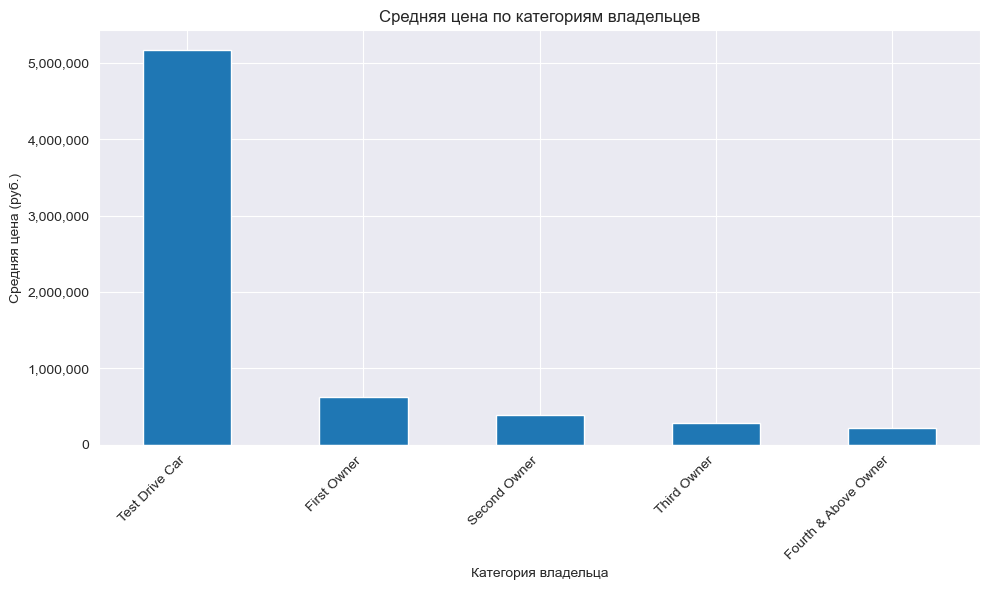

In [867]:
avg_price = df_train.groupby('owner')['selling_price'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
avg_price.plot(kind='bar', ax=ax)

ax.set_title('Средняя цена по категориям владельцев')
ax.set_xlabel('Категория владельца')
ax.set_ylabel('Средняя цена (руб.)')

ax.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('{x:,.0f}')
)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.tight_layout() 
plt.show()


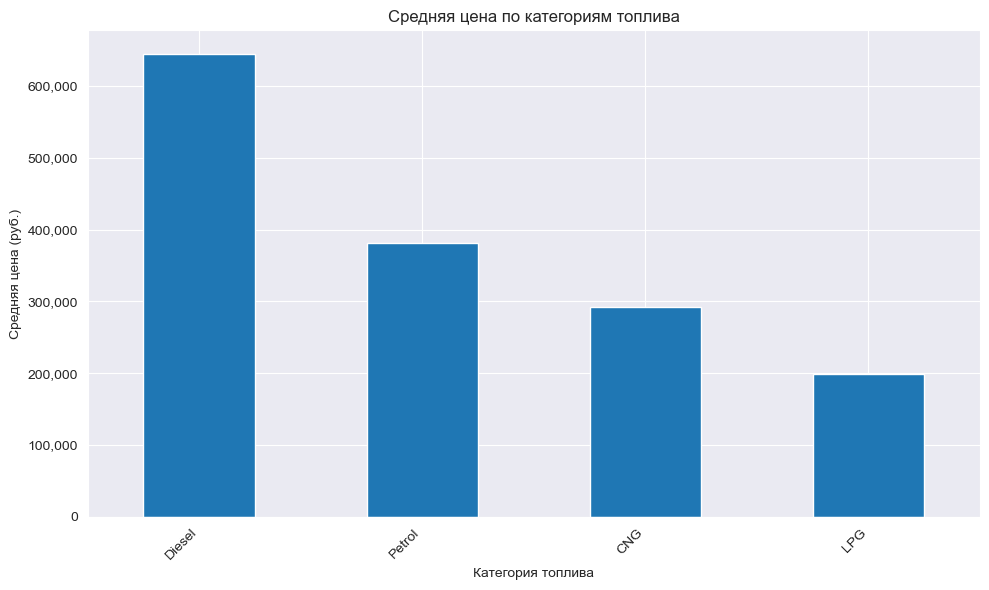

In [868]:
avg_price = df_train.groupby('fuel')['selling_price'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
avg_price.plot(kind='bar', ax=ax)

ax.set_title('Средняя цена по категориям топлива')
ax.set_xlabel('Категория топлива')
ax.set_ylabel('Средняя цена (руб.)')

ax.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('{x:,.0f}')
)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.tight_layout() 
plt.show()


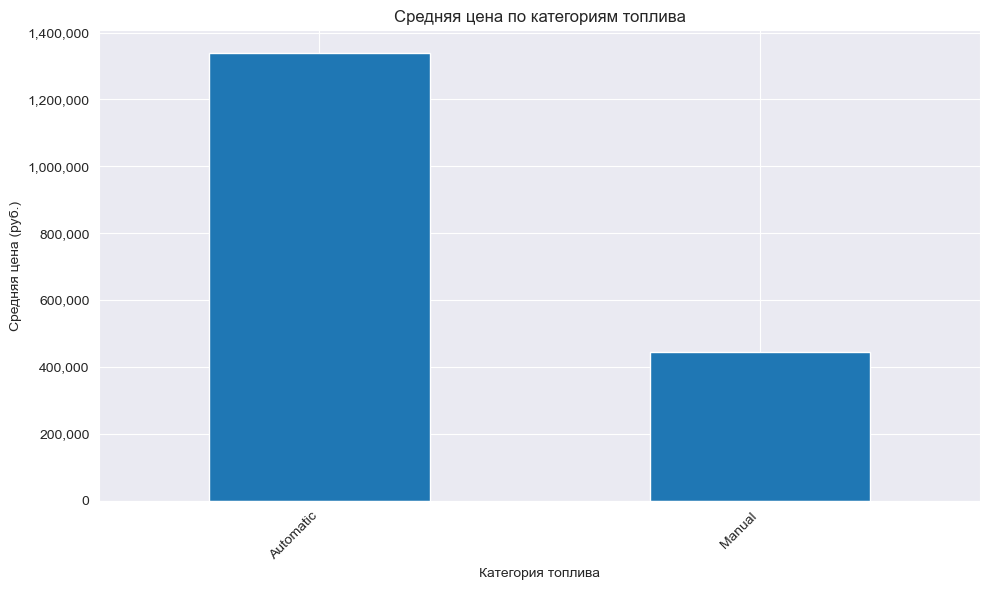

In [869]:
avg_price = df_train.groupby('transmission')['selling_price'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
avg_price.plot(kind='bar', ax=ax)

ax.set_title('Средняя цена по категориям топлива')
ax.set_xlabel('Категория топлива')
ax.set_ylabel('Средняя цена (руб.)')

ax.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('{x:,.0f}')
)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.tight_layout() 
plt.show()


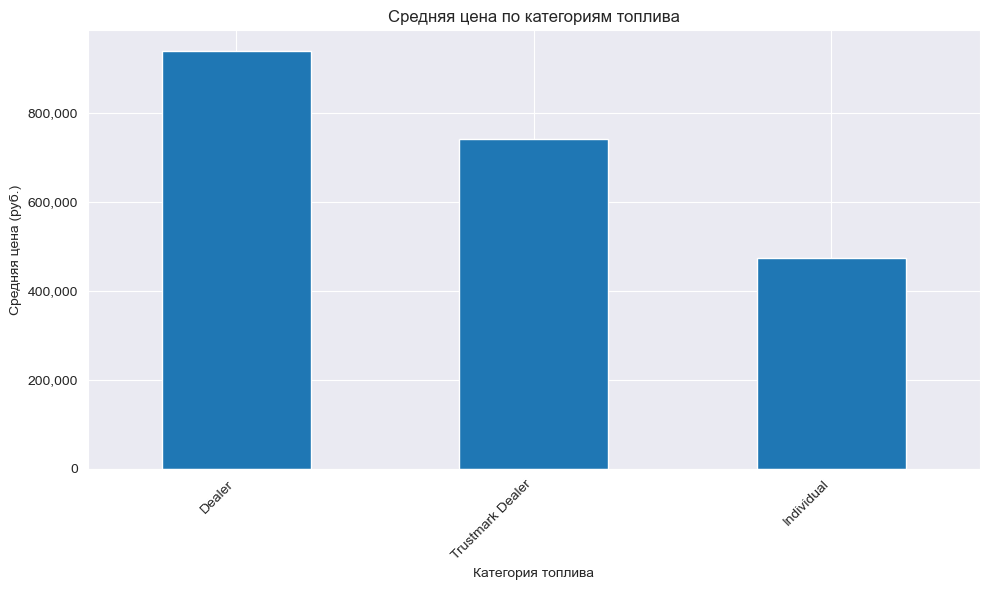

In [870]:
avg_price = df_train.groupby('seller_type')['selling_price'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
avg_price.plot(kind='bar', ax=ax)

ax.set_title('Средняя цена по категориям топлива')
ax.set_xlabel('Категория топлива')
ax.set_ylabel('Средняя цена (руб.)')

ax.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('{x:,.0f}')
)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.tight_layout() 
plt.show()


'В целом все логично - мы нашли еще пару важных корреляций для selling_price: чем меньше владельцев тем выше цена, также машины с автоматической коробкой передач стоят дороже. Еще мы видим, что машина с салона будет стоить дороже, чем машина, которая перепродается или продается с рук.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [871]:
df_copy = df_train[["max_power", "engine", "seats", "mileage", "km_driven", "year", "selling_price"]]

y_train = df_copy["selling_price"]  
X_train = df_copy.drop("selling_price", axis=1) 


In [872]:
assert X_train.shape == (5840, 6)

In [873]:
df_copy = df_test[["max_power", "engine", "seats", "mileage", "km_driven", "year", "selling_price"]]

y_test = df_copy["selling_price"]
X_test = df_copy.drop("selling_price", axis=1)

In [874]:
assert X_test.shape == (1000, 6)

In [54]:
df_train.to_csv('data/dataset_train.csv', index=False)
df_test.to_csv('data/dataset_test.csv', index=False)
print("Исходные датасеты сохранены в CSV")


Исходные датасеты сохранены в CSV


### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [875]:
from sklearn.metrics import mean_squared_error
# your code here
# использую гугл, лекции и LLM - так как тема достаточно новая
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred_lin = model.predict(X_train)
y_test_pred_lin = model.predict(X_test)

train_mse = MSE(y_train, y_train_pred_lin)
train_r2 = r2_score(y_train, y_train_pred_lin)

test_mse = MSE(y_test, y_test_pred_lin)
test_r2 = r2_score(y_test, y_test_pred_lin)

print("Метрики на обучающей выборке (train):")
print(f"  MSE:  {train_mse:,.5f}")
print(f"  R²:   {train_r2:.5f}")


print("\nМетрики на тестовой выборке (test):")
print(f"  MSE:  {test_mse:,.5f}")
print(f"  R²:   {test_r2:.5f}")


Метрики на обучающей выборке (train):
  MSE:  117,092,890,887.08061
  R²:   0.59150

Метрики на тестовой выборке (test):
  MSE:  233,842,450,571.95251
  R²:   0.59320


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [876]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_st = LinearRegression()
model_st.fit(X_train, y_train)

y_train_pred_linst = model_st.predict(X_train)
y_test_pred_linst = model_st.predict(X_test)

train_mse = MSE(y_train, y_train_pred_linst)
train_r2 = r2_score(y_train, y_train_pred_linst)

test_mse = MSE(y_test, y_test_pred_linst)
test_r2 = r2_score(y_test, y_test_pred_linst)

print("Метрики на обучающей выборке (train):")
print(f"  MSE:  {train_mse:,.5f}")
print(f"  R²:   {train_r2:.5f}")


print("\nМетрики на тестовой выборке (test):")
print(f"  MSE:  {test_mse:,.5f}")
print(f"  R²:   {test_r2:.5f}")

Метрики на обучающей выборке (train):
  MSE:  117,092,890,887.08099
  R²:   0.59150

Метрики на тестовой выборке (test):
  MSE:  233,842,450,571.96976
  R²:   0.59320


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [877]:
# your code here

X_columns = df_copy.drop("selling_price", axis=1) 
for i, coef in enumerate(model_st.coef_):
    print(f"{X_columns.columns[i]}: {coef:.4f}")
    


max_power: 320292.4022
engine: 60613.5675
seats: -22791.1545
mileage: 25451.2450
km_driven: -42906.5008
year: 160763.5762


'Наиболее информативным признаком является max_power, этот признак имеет самый большой вес'

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [878]:
lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train, y_train)

y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

train_mse_lasso = MSE(y_train, y_train_pred_lasso)
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)

test_mse_lasso = MSE(y_test, y_test_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

print("Метрики на обучающей выборке (train):")
print(f"  MSE:  {train_mse_lasso:,.5f}")
print(f"  R²:   {train_r2_lasso:.5f}")

print("\nМетрики на тестовой выборке (test):")
print(f"  MSE:  {test_mse_lasso:,.5f}")
print(f"  R²:   {test_r2_lasso:.5f}")
# your code here

Метрики на обучающей выборке (train):
  MSE:  117,092,890,897.27640
  R²:   0.59150

Метрики на тестовой выборке (test):
  MSE:  233,843,103,027.78787
  R²:   0.59320


In [879]:
# your code here
coefficients = lasso.coef_

print("\nКоэффициенты модели:")
for i, coef in enumerate(coefficients):
    print(f"Признак {i+1}: {coef:.6f}")

num_zero = np.sum(coefficients == 0)

print(f"\nОбнулено коэффициентов: {num_zero}")



Коэффициенты модели:
Признак 1: 320293.433789
Признак 2: 60608.650634
Признак 3: -22788.225756
Признак 4: 25449.448147
Признак 5: -42905.395751
Признак 6: 160763.240392

Обнулено коэффициентов: 0


Я думаю, что коэффиценты не обнулились потому что нет слишком маленьких весов + 4 признака находятся примерно в одной области (20000 и 40000 небольшая разница) и тогда если б занулили какой то признак, то надо было бы занулять 4 признака.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

1. Всего обучено моделей:
    param_grid - задал 50 параметров, cv = 10 - 10 фолдов
    Итого, обучено 50*10=500 моделей
    
 2. Из вывода видно лучший alpha = 690.59

 3. Ответ про обнуление коэффициентов ниже

In [880]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(random_state=42, max_iter=50000, tol=1e-8))
])

param_grid = {
    'lasso__alpha': np.concatenate([
        np.logspace(-3, 0, 20),   
        np.linspace(1, 10000, 30)   
    ])
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=1,
    verbose=1,
    return_train_score=True,
    refit=True
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

best_lasso = grid_search.best_estimator_

y_train_pred_best_lasso = best_lasso.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred_best_lasso)
train_mse = MSE(y_train, y_train_pred_best_lasso)

print("\nКачество на train выборке:")
print(f"R²: {train_r2:.5f}")
print(f"MSE: {train_mse:.5f}")


y_test_pred_best_lasso = best_lasso.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred_best_lasso)
test_mse = MSE(y_test, y_test_pred_best_lasso)

print("\nКачество на test выборке:")
print(f"R²: {test_r2:.5f}")
print(f"MSE: {test_mse:.5f}")


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Лучшие параметры: {'lasso__alpha': np.float64(690.5862068965517)}

Качество на train выборке:
R²: 0.59148
MSE: 117097621242.05034

Качество на test выборке:
R²: 0.59239
MSE: 234308200587.92496


In [881]:
# your code her
coefficients =  best_lasso.named_steps['lasso'].coef_

print("\nКоэффициенты модели:")
for i, coef in enumerate(coefficients):
    print(f"Признак {i+1}: {coef:.6f}")

num_zero = np.sum(coefficients == 0)

print(f"\nОбнулено коэффициентов: {num_zero}")



Коэффициенты модели:
Признак 1: 320899.797252
Признак 2: 57339.179018
Признак 3: -20825.567938
Признак 4: 24204.102325
Признак 5: -42148.731015
Признак 6: 160551.305875

Обнулено коэффициентов: 0


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [882]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('elasticnet', ElasticNet(random_state=42, max_iter=5000))
])

param_grid = {
    'elasticnet__alpha': np.logspace(-4, 4, 50),  
    'elasticnet__l1_ratio': [0.2, 0.5]
}


grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=10,                           
    scoring='neg_mean_squared_error',                
    n_jobs=1,                   
    verbose=1,
    refit=True                     
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

best_elasticnet = grid_search.best_estimator_

y_train_pred_best_elastic = best_elasticnet.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred_best_elastic)
train_mse = MSE(y_train, y_train_pred_best_elastic)

print("\nКачество на train выборке:")
print(f"R²: {train_r2:.4f}")
print(f"MSE: {train_mse:.4f}")

y_test_pred_best_elastic = best_elasticnet.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred_best_elastic)
test_mse = MSE(y_test, y_test_pred_best_elastic)


print("\nКачество на test выборке:")
print(f"R²: {test_r2:.4f}")
print(f"MSE: {test_mse:.4f}")


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Лучшие параметры: {'elasticnet__alpha': np.float64(0.02811768697974228), 'elasticnet__l1_ratio': 0.5}

Качество на train выборке:
R²: 0.5914
MSE: 117122616497.6556

Качество на test выборке:
R²: 0.5901
MSE: 235605453503.0143


1. param_grid задано 50 вариантов для elasticnet_alpha и 2 варианта для elasticnet_l1_ratio, и задано cv = 10 - 10 фолдов. Тогда, обучено было всего 50*2*10 моделей = 1000 моделей.
2. Лучшие гиперпараметры: elasticnet__alpha = 0.0281, elasticnet__l1_ratio = 0.5

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [883]:
# your code here
# X_train_cat = df_train.drop(['name', 'selling_price'], axis=1)

# НЕ СТАЛ УДАЛЯТЬ, ПОТОМУ ЧТО НИЖЕ ПРИДУМАЛ КАК ЭТУ КОЛОНКУ ПРЕДОБРАБОТАТЬ

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [884]:
def preprocess_name(value):
    return str(value).split()[0].lower()

X_train_cat = df_train
X_train_cat['name'] = X_train_cat['name'].apply(preprocess_name)

X_test_cat = df_test
X_test_cat['name'] = X_test_cat['name'].apply(preprocess_name)

print(X_train_cat.head(5))

      name  year  selling_price  km_driven    fuel seller_type transmission  \
0   maruti  2014         450000     145500  Diesel  Individual       Manual   
1    skoda  2014         370000     120000  Diesel  Individual       Manual   
2  hyundai  2010         225000     127000  Diesel  Individual       Manual   
3   maruti  2007         130000     120000  Petrol  Individual       Manual   
4  hyundai  2017         440000      45000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats  
0   First Owner    23.40    1248      74.00      5  
1  Second Owner    21.14    1498     103.52      5  
2   First Owner    23.00    1396      90.00      5  
3   First Owner    16.10    1298      88.20      5  
4   First Owner    20.14    1197      81.86      5  


In [885]:
assert X_train_cat.shape == (5840, 12)
# не стал удалять name - предобработал его - оставив только марку

In [886]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,30,4,3,2,5
top,maruti,Diesel,Individual,Manual,First Owner
freq,1804,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [887]:
categorical_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']


encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train_cat[categorical_cols])  

X_test_encoded = encoder.transform(X_test_cat[categorical_cols])  

encoded_train_df = pd.DataFrame(
    X_train_encoded,
    columns=encoder.get_feature_names_out(categorical_cols)
)

encoded_test_df = pd.DataFrame(
    X_test_encoded,
    columns=encoder.get_feature_names_out(categorical_cols)
)

X_train_final = pd.concat([
    X_train_cat.drop(columns=categorical_cols),
    encoded_train_df
], axis=1)

X_test_final = pd.concat([
    X_test_cat.drop(columns=categorical_cols),
    encoded_test_df
], axis=1)

X_train = X_train_final.drop('selling_price', axis=1)
y_train = X_train_final['selling_price']

X_test = X_test_final.drop('selling_price', axis=1)
y_test = X_test_final['selling_price']



C:\Users\Albert13\miniconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [888]:
# your code here
alphas = np.logspace(-6, 6, 50)  

ridge = Ridge(random_state=42)

grid_search = GridSearchCV(
    estimator=ridge,
    param_grid={'alpha': alphas},
    scoring='r2',           
    cv=10,                 
    n_jobs=1,            
    verbose=1             
)

grid_search.fit(X_train, y_train)

print("Лучший параметр alpha:", grid_search.best_params_['alpha'])

best_ridge = grid_search.best_estimator_
y_train_pred_cat = best_ridge.predict(X_train)
y_test_pred_cat = best_ridge.predict(X_test)


train_r2 = r2_score(y_train, y_train_pred_cat)
train_mse = MSE(y_train, y_train_pred_cat)


print("\nКачество на train выборке:")
print(f"R²: {train_r2:.4f}")
print(f"MSE: {train_mse:.4f}")

test_r2 = r2_score(y_test, y_test_pred_cat)
test_mse = MSE(y_test, y_test_pred_cat)

print("\nКачество на test выборке:")
print(f"R²: {test_r2:.4f}")
print(f"MSE: {test_mse:.4f}")


Fitting 10 folds for each of 50 candidates, totalling 500 fits


C:\Users\Albert13\miniconda3\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=5.01465e-20): result may not be accurate.
C:\Users\Albert13\miniconda3\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=5.0574e-20): result may not be accurate.
C:\Users\Albert13\miniconda3\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=5.10823e-20): result may not be accurate.
C:\Users\Albert13\miniconda3\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.81331e-20): result may not be accurate.
C:\Users\Albert13\miniconda3\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.88843e-20): result may not be accurate.
C:\Users\Albert13\miniconda3\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.97776e-20): result may not be accurate.
C:\Users\Albert13\miniconda3\Lib\site-pac

Лучший параметр alpha: 2.329951810515372

Качество на train выборке:
R²: 0.7655
MSE: 67213372025.4976

Качество на test выборке:
R²: 0.7726
MSE: 130734556430.1406


Да, с добавлением закодированных признаков - модель определенно стала лучше, это видно по r2 и mse: r2 увеличилась, mse уменьшилась. Признаков стало больше - модели стало легче понимать и предсказывать таргет, когда появилось больше признаков, не только вещественных.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [889]:
def business_metric(y_true, y_pred):
    count = 0  
    for i in range(len(y_true)):
        ratio = y_true[i] / y_pred[i]
        if 0.9 < ratio < 1.1:
            count += 1
    return count / len(y_true)  

lin_score = business_metric(y_test, y_test_pred_lin)
linst_score = business_metric(y_test, y_test_pred_linst)
lasso_score = business_metric(y_test, y_test_pred_lasso)
best_lasso_score = business_metric(y_test, y_test_pred_best_lasso)
elastic_score = business_metric(y_test, y_test_pred_best_elastic)
ridge_cat_score = business_metric(y_test, y_test_pred_cat)


print("LINEAR: {:.7f}".format(lin_score))
print("LINEAR WITH STANDART SCALER: {:.7f}".format(linst_score))
print("LASSO: {:.7f}".format(lasso_score))
print("BEST LASSO: {:.7f}".format(best_lasso_score))
print("ELASTIC: {:.7f}".format(elastic_score))
print("RIDGE WITH CATEGORIES: {:.7f}".format(ridge_cat_score))


LINEAR: 0.2170000
LINEAR WITH STANDART SCALER: 0.2170000
LASSO: 0.2170000
BEST LASSO: 0.2180000
ELASTIC: 0.2240000
RIDGE WITH CATEGORIES: 0.3070000


`Лучше всего решает задачу бизнеса последняя модель - ридж регрессия с закодированными признаками, она показывает более высокую точность`

In [55]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

ALL_COLUMNS = [
    'name', 'year', 'selling_price', 'km_driven', 'fuel',
    'seller_type', 'transmission', 'owner', 'mileage', 'engine',
    'max_power', 'seats'
]

NUMERICAL_COLS = ['year', 'km_driven', 'mileage', 'engine', 'max_power']

CATEGORICAL_COLS = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']

TARGET_COL = 'selling_price'

encoded_feature_names = encoder.get_feature_names_out(CATEGORICAL_COLS).tolist()

final_feature_order = NUMERICAL_COLS + encoded_feature_names

ridge_artifacts = {
    'encoder': encoder,
    'scaler': scaler,
    'model': best_ridge,

    'numerical_cols': NUMERICAL_COLS,
    'categorical_cols': CATEGORICAL_COLS,
    'target_col': TARGET_COL,
    'encoded_feature_names': encoded_feature_names,
    'final_feature_order': final_feature_order,

    'model_info': {
        'best_alpha': grid_search.best_params_['alpha'],
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mse': train_mse,
        'test_mse': test_mse
    },

    'version': '1.0',
    'saved_at': pd.Timestamp.now(),

    'all_columns': ALL_COLUMNS,
    'expected_dtypes': {col: 'object' if col in CATEGORICAL_COLS else 'float64' for col in ALL_COLUMNS}
}

with open('model.pkl', 'wb') as f:
    pickle.dump(ridge_artifacts, f)

print("Модель и все артефакты успешно сохранены в 'model.pkl'")


Модель и все артефакты успешно сохранены в 'model.pkl'


# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 18 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Далее в этот же репозиторий вы прикрепите вторую часть. Под результатами первой части понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)
